In [ ]:
from google.colab import drive
drive.mount('/content/drive')    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 


      

In [ ]:
# import data set from the local driver 
df=pd.read_csv('drive/My Drive/Colab Notebooks/SWaT_Dataset_Attack_v0 - Copy.csv') # ,parse_dates = ['Timestamp'], index_col = 'Timestamp')
df.head()    

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [ ]:
# Extract the sensor components that begin with the list 
df1=df.filter(regex='(^Time|^PIT|^AIT|^FIT|^DPI|^LIT|^Norma)',axis=1)#.head()
df1.head()   

,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,262.0161,8.394514,328.6337,2.442316,19.69076,2.208628,956.4855,...,12.03538,1.723404,1.293967,0.735269,0.308619,250.8812,1.649953,189.6789,0.000128,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,262.0161,8.394514,328.6337,2.442316,19.69076,2.208628,956.8060,...,12.03538,1.723404,1.281158,0.735269,0.308619,250.8812,1.649953,189.6148,0.000128,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,262.0161,8.394514,328.6337,2.443085,19.69076,2.208628,957.0864,...,12.03538,1.723404,1.281158,0.735269,0.308619,250.8812,1.649953,189.5027,0.000128,Normal


In [ ]:
# remove the space on Normal/Attack columns 
df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')  
#To see how the data is spread betwen Attack and Normal 
print(df1.groupby('Normal/Attack')['Normal/Attack'].count())  
# Rename the col name Normal/Attack with A   
df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)
df1.head(2)     

Normal/Attack
Attack     54621
Normal    395298
Name: Normal/Attack, dtype: int64


<ipython-input-6-1415f4d3d690>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')
<ipython-input-6-1415f4d3d690>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)


,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,28/12/2015 10:00:00 AM,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,Normal


In [ ]:
# Convert non-numeric class to numeric

df1.A[df1.A== 'Normal'] = 0 
df1.A[df1.A == 'Attack'] = 1    
df1.shape 

<ipython-input-7-1a8f84d0d5a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A== 'Normal'] = 0
<ipython-input-7-1a8f84d0d5a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A == 'Attack'] = 1


(449919, 27)

In [ ]:

# make the class as float 
df1['A'] = df1['A'].astype('float')    

<ipython-input-8-aa5235461a7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['A'] = df1['A'].astype('float')


In [ ]:
#If there are missing entries, drop them.
df1.dropna(inplace=True)#,axis=1)  
# Total number of rows and columns 
df1.shape     

<ipython-input-9-9ff2dea4420b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)#,axis=1)


(449919, 27)

In [ ]:
# Dropping the duplicates 
dff= df1.drop_duplicates()
dff.shape 

(449919, 27)

#### Normalize using min Max scaler  

In [ ]:
# build the scaler model 
# from sklearn.preprocessing import MinMaxScaler 

con_feats = ['FIT101','LIT101','AIT201','AIT202','AIT203','FIT201','DPIT301','FIT301','FIT301','LIT301','AIT401',
            'AIT402','FIT401','LIT401','AIT501','AIT502','AIT503','AIT504','FIT501','FIT502','FIT503','FIT504',
            'PIT501','PIT502','PIT503','FIT601'] 
scaler = MinMaxScaler() 
dff[con_feats] = scaler.fit_transform(dff[con_feats])
dff.head(2)    

,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,28/12/2015 10:00:00 AM,0.879322,0.452962,0.942783,0.876785,0.436773,0.865044,0.438853,0.928726,0.70735,...,0.005773,0.98297,0.940678,0.99154,0.987464,0.985802,0.837398,0.987359,0.000071,0.0
1,28/12/2015 10:00:01 AM,0.886285,0.453015,0.942783,0.876785,0.436773,0.865044,0.438853,0.929319,0.70735,...,0.005773,0.98297,0.953861,0.99154,0.987464,0.985802,0.837398,0.987783,0.000071,0.0


In [ ]:
# a Timestamp as index 
dff= dff.set_index('Timestamp') 
dff.head(2)    

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,0.879322,0.452962,0.942783,0.876785,0.436773,0.865044,0.438853,0.928726,0.70735,0.5,...,0.005773,0.98297,0.940678,0.99154,0.987464,0.985802,0.837398,0.987359,0.000071,0.0
28/12/2015 10:00:01 AM,0.886285,0.453015,0.942783,0.876785,0.436773,0.865044,0.438853,0.929319,0.70735,0.5,...,0.005773,0.98297,0.953861,0.99154,0.987464,0.985802,0.837398,0.987783,0.000071,0.0


#### Split the Data to train and Test   (20 to 80 % )

In [ ]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
x_good_train, x_good_test = train_test_split(dff, test_size=0.2, random_state=42)   

In [ ]:

# min max scale the input data or Standard Scaler  
x_good_train = x_good_train[x_good_train.A == 0] #where normal transactions 
x_good_train = x_good_train.drop(['A'], axis=1) #drop the class columns 

test_y = x_good_test['A'] # save the class column for the test set 
x_good_test = x_good_test.drop(['A'], axis=1) #drop the class column 

#transform to ndarray both train and testing 
x_good_train = x_good_train.values #transform to ndarray 
x_good_test = x_good_test.values 
x_good_train.shape, x_good_test.shape#,x_good_train.shape,test_y.shape  

((316353, 25), (89984, 25))

#### Build the model 

In [ ]:
#Define the autoencoder model
from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from keras.layers import Input, Dense
from keras import regularizers 
from keras.models import Model, load_model 
import datetime  

In [ ]:
model = Sequential()
# encoder 
model.add(Dense(128, input_dim=x_good_train.shape[1], activation='relu')) # Input layers 
Dropout(0.01), 
model.add(Dropout(0.2)) 
# hidden layers
model.add(Dense(64, activation='relu'))
Dropout(0.01), 
#Decoder 
model.add(Dense(128, activation='relu')) ## decoder 
Dropout(0.01), 
# output layers  
model.add(Dense(x_good_train.shape[1])) 
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam')  
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 25)                3225      
                                                                 
Total params: 23,129
Trainable params: 23,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_good_test.shape[1]  

25

In [ ]:
import time
t0 = time.time() 
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 
grid=model.fit(
    x_good_train,x_good_train,
    verbose=2,
    epochs=15,
    batch_size=256,
    validation_data=(x_good_test, x_good_test), 
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])  
score=model.evaluate(x_good_test, x_good_test, verbose=1)
print('Test loss:', score[0]) 
print('Accuracy:', score[1])  
# print Model
print("Training time:", time.time()-t0)  

Epoch 1/15
1236/1236 - 8s - loss: 0.0385 - accuracy: 0.2656 - val_loss: 0.0317 - val_accuracy: 0.3355 - 8s/epoch - 6ms/step
Epoch 2/15
1236/1236 - 5s - loss: 0.0336 - accuracy: 0.3698 - val_loss: 0.0315 - val_accuracy: 0.3548 - 5s/epoch - 4ms/step
Epoch 3/15
1236/1236 - 8s - loss: 0.0336 - accuracy: 0.4249 - val_loss: 0.0315 - val_accuracy: 0.3914 - 8s/epoch - 6ms/step
Epoch 4/15
1236/1236 - 5s - loss: 0.0336 - accuracy: 0.4586 - val_loss: 0.0313 - val_accuracy: 0.4298 - 5s/epoch - 4ms/step
Epoch 5/15
1236/1236 - 7s - loss: 0.0336 - accuracy: 0.4902 - val_loss: 0.0314 - val_accuracy: 0.5429 - 7s/epoch - 6ms/step
Epoch 6/15
1236/1236 - 5s - loss: 0.0336 - accuracy: 0.5053 - val_loss: 0.0313 - val_accuracy: 0.3774 - 5s/epoch - 4ms/step
Epoch 7/15
1236/1236 - 5s - loss: 0.0336 - accuracy: 0.5195 - val_loss: 0.0313 - val_accuracy: 0.5539 - 5s/epoch - 4ms/step
Epoch 8/15
1236/1236 - 6s - loss: 0.0336 - accuracy: 0.5346 - val_loss: 0.0312 - val_accuracy: 0.5491 - 6s/epoch - 5ms/step
Epoch 9/

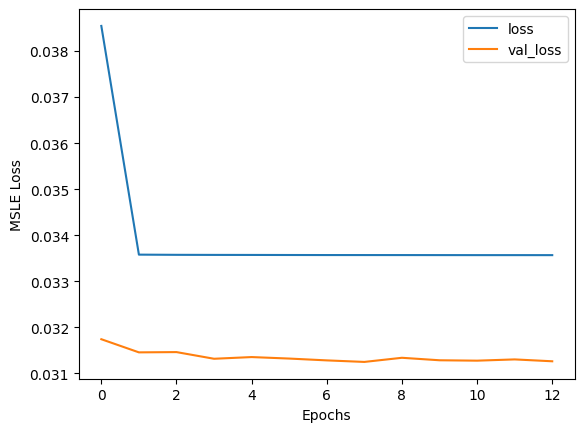

In [ ]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['val_loss'])
#plt.plot(grid.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss','val_loss'])#,'accuracy'])
plt.show()  

In [ ]:
# to identify the reconstruction error between the Decoder and encoder 
test_x_predictions = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)  
error_df.head()  

2812/2812 [==============================] - 4s 1ms/step


,Reconstruction_error,A
Timestamp,,
30/12/2015 5:27:44 AM,0.181866,0.0
30/12/2015 9:03:21 AM,0.171581,0.0
1/1/2016 12:02:18 AM,0.178676,0.0
2/1/2016 5:45:50 AM,0.200996,0.0
28/12/2015 9:25:49 PM,0.188062,0.0


In [ ]:
# find the maximum RMSE values using reconstruction error 
maxValues = error_df.max()
 
print(maxValues)  

Reconstruction_error    0.268193
A                       1.000000
dtype: float64


In [ ]:
# To identify the maximum and minimum data point for identifying bins 
import tensorflow as tf 
# reconstruction loss for normal test data
train_loss = tf.keras.losses.mse(test_x_predictions, x_good_test)
trainloss=pd.DataFrame(train_loss)
trainloss.describe()   

,0
count,89984.000000
mean,0.196647
std,0.034535
min,0.048487
25%,0.181158
50%,0.205999
75%,0.220222
max,0.268193


Text(0.5, 1.0, 'bins - loss distribution = 58')

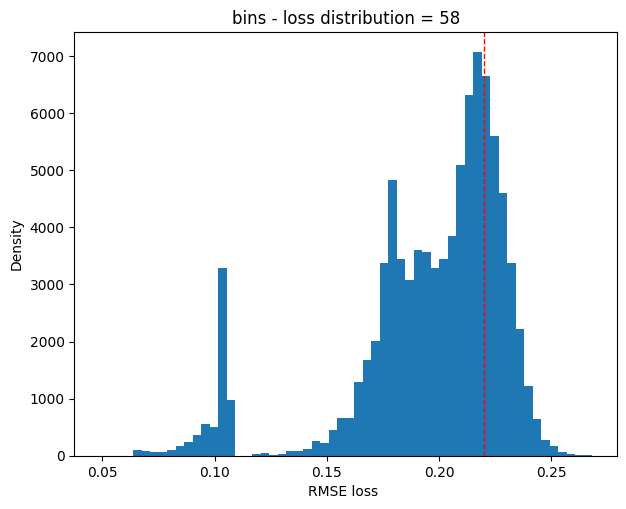

In [ ]:
# rules-of-thumb to identify the number of bins Freedman–Diaconis rule 
trainloss=pd.DataFrame(trainloss) 
q1 = trainloss.quantile(0.023735)
q3 = trainloss.quantile(0.295337)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(trainloss) ** (1 / 3))
bin_count = int(np.ceil((trainloss.max() - trainloss.min()) / bin_width))
fig = plt.figure(figsize=(7,5.5))
plt.hist(train_loss, bins = bin_count) 
plt.axvline(0.22,0, 3000,color='red', linestyle='dashed', linewidth=1)
#sns.histplot(x=trainloss,bins=bin_count)
plt.xlabel('RMSE loss ')
plt.ylabel('Density')
plt.title(f'bins - loss distribution = {bin_count}') 

In [ ]:
# finding the number of anomalies using reconstruction Error 
outliers = error_df.index[error_df.Reconstruction_error >0.24].tolist()  
number_of_outliers = len(outliers) 
print("Number of elements in the anomalies: ", number_of_outliers) 

Number of elements in the anomalies:  1636


In [ ]:
# classfication report 
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score 
threshold_fixed = 0.24
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.A, pred_y)
plt.figure(figsize=(4, 4))

# print confustion matrix 
print(conf_matrix)
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['A'], error_df['pred']))
print(" Recall: ",recall_score(error_df['A'], error_df['pred']))
print(" Precision: ",precision_score(error_df['A'], error_df['pred']))  
print(classification_report(error_df['A'], error_df['pred']))   

[[77428  1517]
 [10920   119]]
 Accuracy:  0.861786539829303
 Recall:  0.01077996195307546
 Precision:  0.07273838630806846
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     78945
         1.0       0.07      0.01      0.02     11039

    accuracy                           0.86     89984
   macro avg       0.47      0.50      0.47     89984
weighted avg       0.78      0.86      0.81     89984



<Figure size 400x400 with 0 Axes>

### ds2 contain the data only the sensor LIT- 101 

In [ ]:
# taking only LIT101 sensor 
df1_LIT101=df1[['Timestamp','LIT101','A']]
df1_LIT101.head()  

,Timestamp,LIT101,A
0,28/12/2015 10:00:00 AM,522.8467,0.0
1,28/12/2015 10:00:01 AM,522.8860,0.0
2,28/12/2015 10:00:02 AM,522.8467,0.0
3,28/12/2015 10:00:03 AM,522.9645,0.0
4,28/12/2015 10:00:04 AM,523.4748,0.0


In [ ]:
 # make the class as float 
df1_LIT101['A'] = df1_LIT101['A'].astype('float')   

<ipython-input-33-7139d4e27e56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_LIT101['A'] = df1_LIT101['A'].astype('float')


In [ ]:
# a Timestamp as index 
df1_LIT101_one= df1_LIT101.set_index('Timestamp') 
df1_LIT101_one.head()   

,LIT101,A
Timestamp,,
28/12/2015 10:00:00 AM,522.8467,0.0
28/12/2015 10:00:01 AM,522.8860,0.0
28/12/2015 10:00:02 AM,522.8467,0.0
28/12/2015 10:00:03 AM,522.9645,0.0
28/12/2015 10:00:04 AM,523.4748,0.0


In [ ]:
#If there are missing entries, drop them.
df1_LIT101_one.dropna(inplace=True)#,axis=1)  
# Total number of rows and columns 
df1_LIT101_one.shape    

(449919, 2)

In [ ]:
# build the scaler model 
# from sklearn.preprocessing import MinMaxScaler 

con_feats = ['LIT101'] 
scaler = MinMaxScaler() 
df1_LIT101_one[con_feats] = scaler.fit_transform(df1_LIT101_one[con_feats])
df1_LIT101_one.head()   

,LIT101,A
Timestamp,,
28/12/2015 10:00:00 AM,0.452962,0.0
28/12/2015 10:00:01 AM,0.453015,0.0
28/12/2015 10:00:02 AM,0.452962,0.0
28/12/2015 10:00:03 AM,0.453122,0.0
28/12/2015 10:00:04 AM,0.453816,0.0


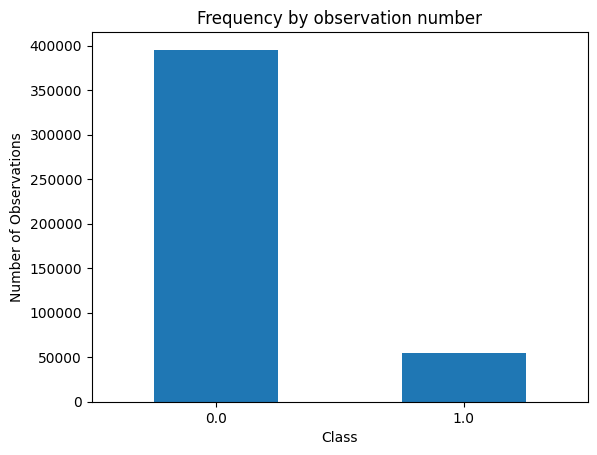

In [ ]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(df1_LIT101_one['A'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1_LIT101_one['A'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");   

In [ ]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
x_good_train_LIT101, x_good_test_LIT101 = train_test_split(df1_LIT101_one, test_size=0.2, random_state=42)   

In [ ]:
# min max scale the input data or Standard Scaler  
x_good_train_LIT101 = x_good_train_LIT101[x_good_train_LIT101.A == 0] #where normal transactions 
x_good_train_LIT101 = x_good_train_LIT101.drop(['A'], axis=1) #drop the class columns 

test_y_LIT101 = x_good_test_LIT101['A'] # save the class column for the test set 
x_good_test_LIT101 = x_good_test_LIT101.drop(['A'], axis=1) #drop the class column 

#transform to ndarray both train and testing 
x_good_train_LIT101 = x_good_train_LIT101.values #transform to ndarray 
x_good_test_LIT101 = x_good_test_LIT101.values 
x_good_train_LIT101.shape, x_good_test_LIT101.shape#,x_good_train.shape,test_y.shape  

((316353, 1), (89984, 1))

In [ ]:
#Define the autoencoder model
from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from keras.layers import Input, Dense
from keras import regularizers 
from keras.models import Model, load_model 
import datetime  

In [ ]:
# In[27]:


model2 = Sequential()
# encoder 
model2.add(Dense(32, input_dim=x_good_train_LIT101.shape[1], activation='relu')) # Input layers 
Dropout(0.001), 
# hidden layers
model2.add(Dense(16, activation='relu'))
Dropout(0.001), 
#Decoder 
model2.add(Dense(32, activation='relu')) ## decoder  
Dropout(0.001), 
model2.add(Dense(x_good_train_LIT101.shape[1])) # output layers 
model2.compile(loss='msle',metrics=['accuracy'],optimizer='adam')  
model2.summary()   

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                64        
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 32)                544       
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time
t0 = time.time() 
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 
grid2=model2.fit(
    x_good_train_LIT101,x_good_train_LIT101,
    verbose=2,
    epochs=15,
    batch_size=32,
    validation_data=(x_good_test_LIT101, x_good_test_LIT101), 
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])  
score=model2.evaluate(x_good_test_LIT101, x_good_test_LIT101, verbose=1)
print('Test loss:', score[0]) 
print('Accuracy:', score[1])  
# print Model
print("Training time:", time.time()- t0)   

Epoch 1/15
9887/9887 - 24s - loss: 0.1945 - accuracy: 0.0000e+00 - val_loss: 0.2083 - val_accuracy: 0.0000e+00 - 24s/epoch - 2ms/step
Epoch 2/15
9887/9887 - 20s - loss: 0.1945 - accuracy: 0.0000e+00 - val_loss: 0.2083 - val_accuracy: 0.0000e+00 - 20s/epoch - 2ms/step
Epoch 3/15
9887/9887 - 22s - loss: 0.1945 - accuracy: 0.0000e+00 - val_loss: 0.2083 - val_accuracy: 0.0000e+00 - 22s/epoch - 2ms/step
Epoch 4/15
9887/9887 - 20s - loss: 0.1945 - accuracy: 0.0000e+00 - val_loss: 0.2083 - val_accuracy: 0.0000e+00 - 20s/epoch - 2ms/step
Epoch 5/15
9887/9887 - 22s - loss: 0.1945 - accuracy: 0.0000e+00 - val_loss: 0.2083 - val_accuracy: 0.0000e+00 - 22s/epoch - 2ms/step
Epoch 6/15
9887/9887 - 21s - loss: 0.1945 - accuracy: 0.0000e+00 - val_loss: 0.2083 - val_accuracy: 0.0000e+00 - 21s/epoch - 2ms/step
2812/2812 [==============================] - 4s 2ms/step - loss: 0.2083 - accuracy: 0.0000e+00
Test loss: 0.20830518007278442
Accuracy: 0.0
Training time: 133.02969574928284


In [ ]:
plt.plot(grid2.history['loss'])
plt.plot(grid2.history['val_loss'])
#plt.plot(grid.history['accuracy'])
plt.xlabel('Epochs') 
plt.ylabel('MSLE Loss')
plt.legend(['loss','val_loss'])#,'accuracy'])
plt.show()   

In [ ]:
# to identify the reconstruction error between the Decoder and encoder 
test_x_predictions_LIT101 = model2.predict(x_good_test_LIT101)#,verbose=1)
mse = np.mean(np.power(x_good_test_LIT101 - test_x_predictions_LIT101, 2), axis=1)
error_df_LIT101 = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)  
error_df_LIT101.head()  

2812/2812 [==============================] - 4s 1ms/step


,Reconstruction_error,A
Timestamp,,
30/12/2015 5:27:44 AM,0.644438,0.0
30/12/2015 9:03:21 AM,0.539364,0.0
1/1/2016 12:02:18 AM,0.647041,0.0
2/1/2016 5:45:50 AM,0.671857,0.0
28/12/2015 9:25:49 PM,0.249976,0.0


In [ ]:
# find the maximum RMSE values using reconstruction error 
maxValues_LIT101 = error_df_LIT101.max()
 
print(maxValues_LIT101)  

Reconstruction_error    1.017156
A                       1.000000
dtype: float64


In [ ]:
# To identify the maximum and minimum data point for identifying bins 
import tensorflow as tf 
# reconstruction loss for normal test data
train_loss_LIT101 = tf.keras.losses.mse(test_x_predictions_LIT101, x_good_test_LIT101)
train_loss_LIT101=pd.DataFrame(train_loss_LIT101)
train_loss_LIT101.describe()      

,0
count,89984.000000
mean,0.359173
std,0.215268
min,0.000001
25%,0.193923
50%,0.219490
75%,0.546046
max,1.017156


Text(0.5, 1.0, 'bins - loss distribution = 23')

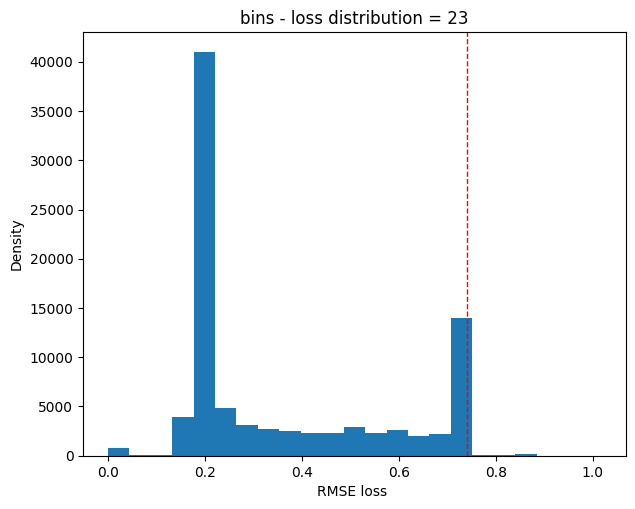

In [ ]:
# rules-of-thumb to identify the number of bins Freedman–Diaconis rule 
train_loss_LIT101=pd.DataFrame(train_loss_LIT101) 
q1 = train_loss_LIT101.quantile(0)
q3 = train_loss_LIT101.quantile(1)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(train_loss_LIT101) ** (1 / 3))
bin_count = int(np.ceil((train_loss_LIT101.max() - train_loss_LIT101.min()) / bin_width))
fig = plt.figure(figsize=(7,5.5))
plt.hist(train_loss_LIT101, bins = bin_count) 
plt.axvline(0.74,0, 3000,color='red', linestyle='dashed', linewidth=1)
#sns.histplot(x=trainloss,bins=bin_count)
plt.xlabel('RMSE loss ')
plt.ylabel('Density')
plt.title(f'bins - loss distribution = {bin_count}')  

In [ ]:
# finding the number of anomalies using reconstruction Error 
outliers_LIT101 = error_df_LIT101.index[error_df_LIT101.Reconstruction_error >0.74].tolist()  
number_of_outliers_LIT101 = len(outliers_LIT101)  
print("Number of elements in the anomalies: ", number_of_outliers_LIT101)    

Number of elements in the anomalies:  666


In [ ]:
## classfication report for ds2  
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score 
threshold_fixed = 0.74
pred_y_LIT101= [1 if e > threshold_fixed else 0 for e in error_df_LIT101.Reconstruction_error.values]
error_df_LIT101['pred'] =pred_y_LIT101
conf_matrix = confusion_matrix(error_df_LIT101.A, pred_y_LIT101)
plt.figure(figsize=(4, 4))

# print confustion matrix 
print(conf_matrix)
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df_LIT101['A'], error_df_LIT101['pred']))
print(" Recall: ",recall_score(error_df_LIT101['A'], error_df_LIT101['pred']))
print(" Precision: ",precision_score(error_df_LIT101['A'], error_df_LIT101['pred']))  
print(classification_report(error_df_LIT101['A'], error_df_LIT101['pred']))    

[[78489   456]
 [10829   210]]
 Accuracy:  0.8745888157894737
 Recall:  0.019023462270133164
 Precision:  0.3153153153153153
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     78945
         1.0       0.32      0.02      0.04     11039

    accuracy                           0.87     89984
   macro avg       0.60      0.51      0.48     89984
weighted avg       0.81      0.87      0.82     89984



<Figure size 400x400 with 0 Axes>